#### Autor: Bernardo Salinas Jaquez
#### Fecha: Enero-2021
#### K-Means. Datos de personalidades de usuarios en Twitter



### Objetivo
Aplicar el algoritmo de K-Means para clasificar las diferentes tipos de personalidades de distintos usuarios de Twitter.

### Descripcíon
Se utilza mediante comandos e instrucciones de Python y un conjunto de datos sobre los datos de distintos usuarios en Twitter, el algoritmo K-Means trata de agrupar estos usuarios -no por su actividad laboral- si no, por sus similitudes en la personalidad.

### Fundamento teórico

K-Means es un algoritmo no supervisado de Clustering. Se utiliza cuando tenemos un montón de datos sin etiquetar. El objetivo de este algoritmo es el de encontrar “K” grupos (clusters) entre los datos crudos. En este artículo repasaremos sus conceptos básicos y veremos un ejemplo paso a paso en python que podemos descargar. [Bagnato, 2018]

El algoritmo trabaja iterativamente para asignar a cada “punto” (las filas de nuestro conjunto de entrada forman una coordenada) uno de los “K” grupos basado en sus características. Son agrupados en base a la similitud de sus features (las columnas). Como resultado de ejecutar el algoritmo tendremos:

* Los “centroids” (centroides) de cada grupo que serán unas “coordenadas” de cada uno de los K conjuntos que se utilizarán para poder etiquetar nuevas muestras.
* Etiquetas para el conjunto de datos de entrenamiento. Cada etiqueta perteneciente a uno de los K grupos formados.


Los grupos se van definiendo de manera “orgánica”, es decir que se va ajustando su posición en cada iteración del proceso, hasta que converge el algoritmo. Una vez hallados los centroids deberemos analizarlos para ver cuales son sus características únicas, frente a la de los otros grupos. Estos grupos son las etiquetas que genera el algoritmo. [Bagnato, 2018]

**Casos de uso**

El algoritmo de Clustering K-means es uno de los más usados para encontrar grupos ocultos, o sospechados en teoría sobre un conjunto de datos no etiquetado. Esto puede servir para confirmar -o desterrar- alguna teoría que teníamos asumida de nuestros datos. Y también puede ayudarnos a descubrir relaciones asombrosas entre conjuntos de datos, que de manera manual, no hubiéramos reconocido. Una vez que el algoritmo ha ejecutado y obtenido las etiquetas, será fácil clasificar nuevos valores o muestras entre los grupos obtenidos. [Bagnato, 2018]

Algunos casos de uso son:

Segmentación por Comportamiento: relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.
Categorización de Inventario: agrupar productos por actividad en sus ventas
Detectar anomalías o actividades sospechosas: según el comportamiento en una web reconocer un troll -o un bot- de un usuario normal

#### 1. Cargar librerías

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import classification_report

 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

#### 2. Cargar datos

* Mostrar los primeros cinco registros
* Mostrar los ultimos cinco registros

In [32]:
datos = pd.read_csv("https://raw.githubusercontent.com/BernardoSJ/Casos-analisis-inteligente-de-datos/main/datos/analisis%20usuarios%20de%20Twitter.csv", delimiter=",")
datos.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [33]:
datos.tail()

,usuario,op,co,ex,ag,ne,wordcount,categoria
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1
139,_josecoronado_,36.258913,18.769348,45.225652,39.427283,9.252065,113.7391,1


#### 3. Descripción de los datos

Como variables independientes: (Las marcadas en negritas son con las que se entra el modelo)
* usuario (el nombre en Twitter)
* **op - Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte** 
* co - Conscientiousness – grado de orden, prolijidad, organización
* **ex - Extraversion – grado de timidez, solitario o participación ante el grupo social**
* **ag - Agreeableness – grado de empatía con los demás, temperamento**
* ne - Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
* Wordcount – Cantidad promedio de palabras usadas en sus tweets

Como cariable dependiente:
* Categoria – Actividad laboral del usuario (actor, cantante, etc.)

Código de categoría

* 1.Actor/actriz
* 2.Cantante
* 3.Modelo
* 4.Tv, series
* 5.Radio
* 6.Tecnología
* 7.Deportes
* 8.Politica
* 9.Escritor

In [34]:
datos.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [35]:
print(datos.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


En total tenemos:

Actor/actriz 27

Cantante 34

Modelo 9

Tv, series 19

Radio 4

Tecnología 8

Deportes 17

Politica 16

Escritor 6

#### 4. Visualización de los datos

* Visualización de la dispersión de los datos

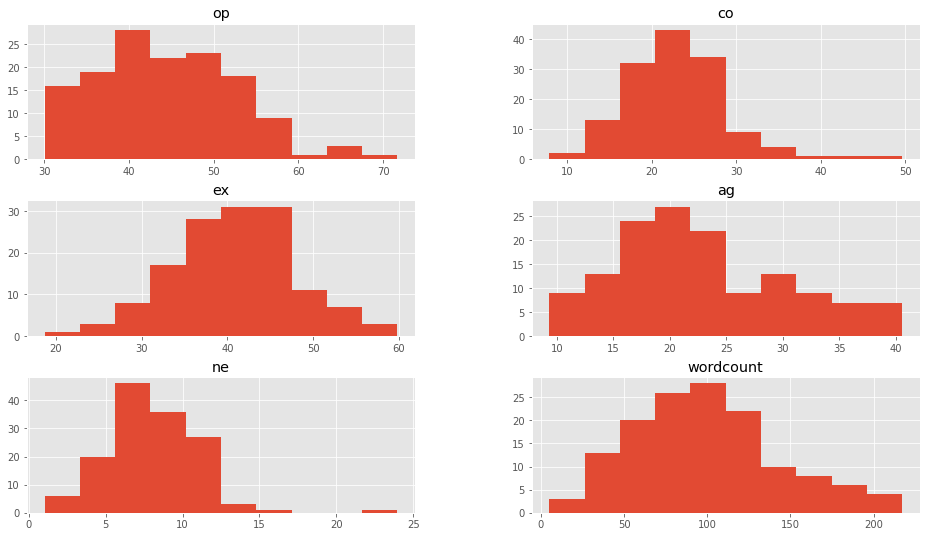

In [36]:
datos.drop(['categoria'],1).hist()
plt.show()

En este caso seleccionamos 3 dimensiones: op, ex y ag y las cruzamos para ver si nos dan alguna pista de su agrupación y la relación con sus categorías.

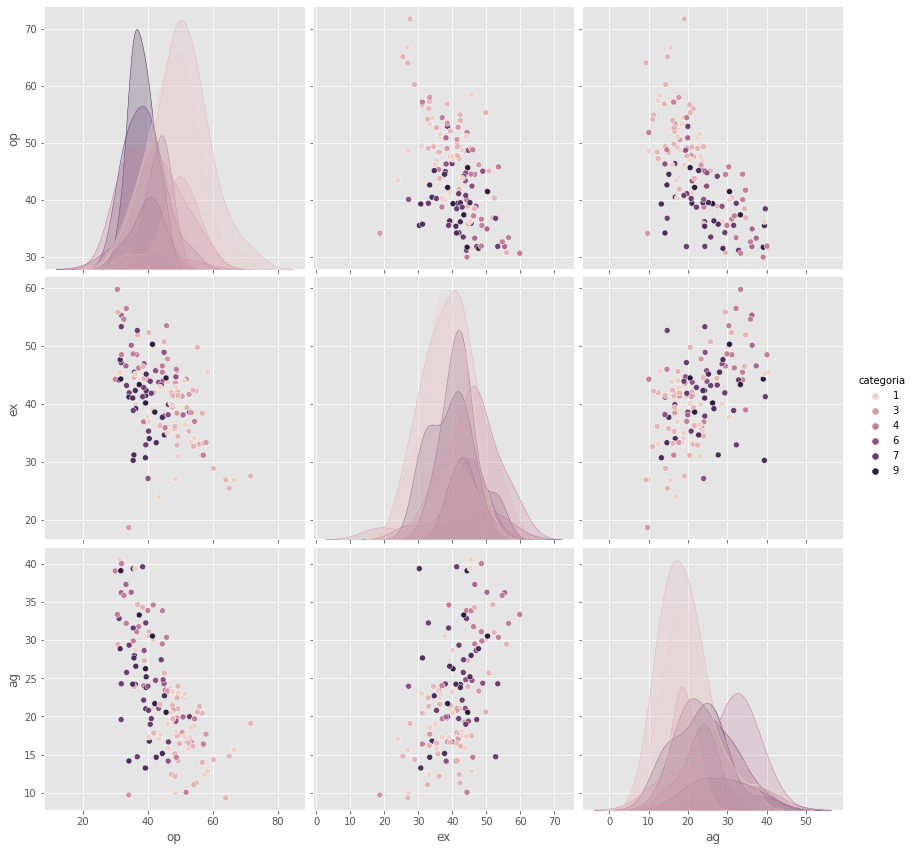

In [37]:
sb.pairplot(datos.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

#### 5. Creación del modelo

Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo. Como se ve, sólo cargamos las columnas op, ex y ag en nuestra variable X (Ya que estas son muy significativas para este caso y además son las más relacionadas con el comportamiento humano).

In [38]:
X = np.array(datos[["op","ex","ag"]])
y = np.array(datos['categoria'])
X.shape

(140, 3)

Hallar el valor de K haciendo una gráfica e intentando hallar el “punto de codo” que comentábamos antes. Este es nuestro resultado:

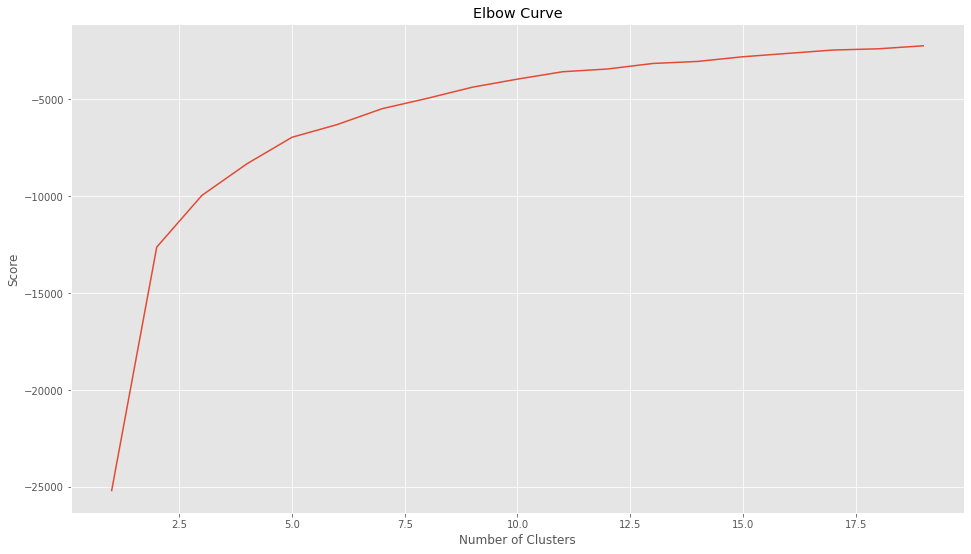

In [39]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

La curva es bastante suave por lo tanto el valor ideal de clusters (K) podría ser 5

Ahora al ejecutar el algoritmo K-Means con 5 clusters obtenemos los centroides y las etiquetas.

In [40]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[39.94672753 42.82349753 23.72594859]
 [35.90241306 47.56828232 33.58748762]
 [43.3644665  31.89755772 19.50586767]
 [59.25320707 31.29770653 15.9896352 ]
 [49.99285115 40.87133549 17.47411785]]


Ahora veremos esto en una gráfica 3D con colores para los grupos y veremos si se diferencian: (las estrellas marcan el centro de cada cluster)

* Realizar predicciones

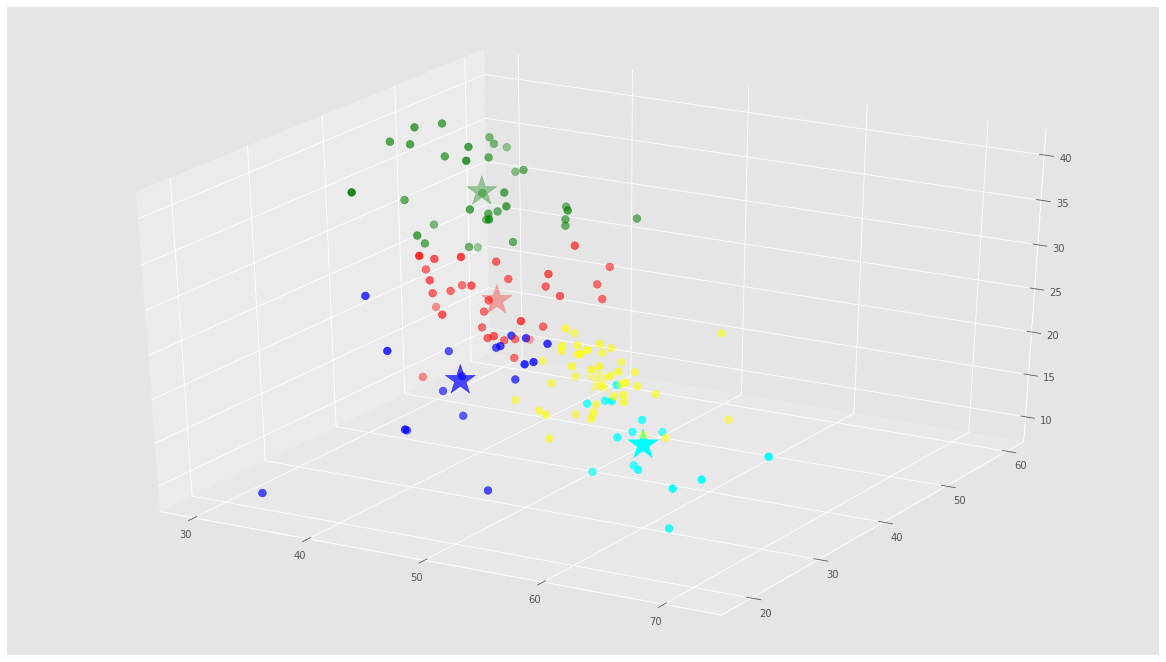

In [41]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

Aqui podemos ver que el Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios de Twitter por su personalidad, teniendo en cuenta las 3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.

Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación:

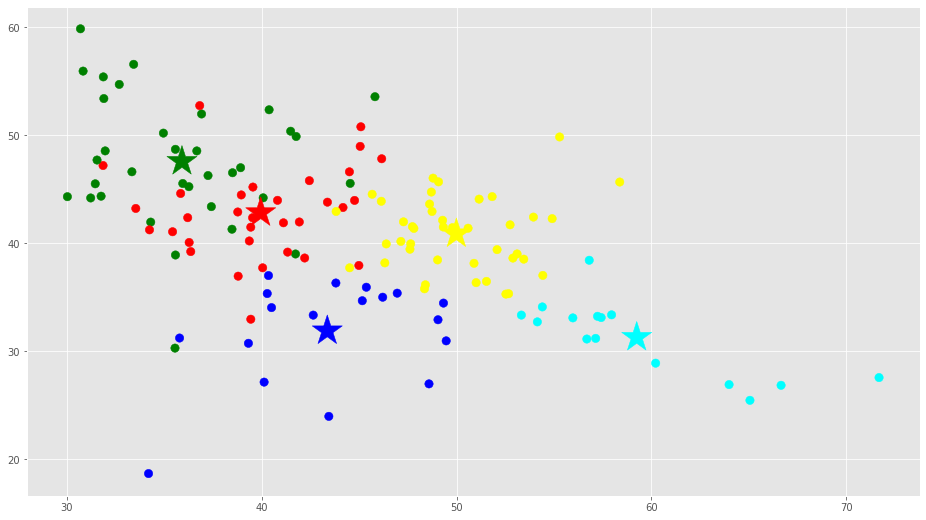

In [42]:
# Getting the values and plotting it
f1 = datos['op'].values
f2 = datos['ex'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

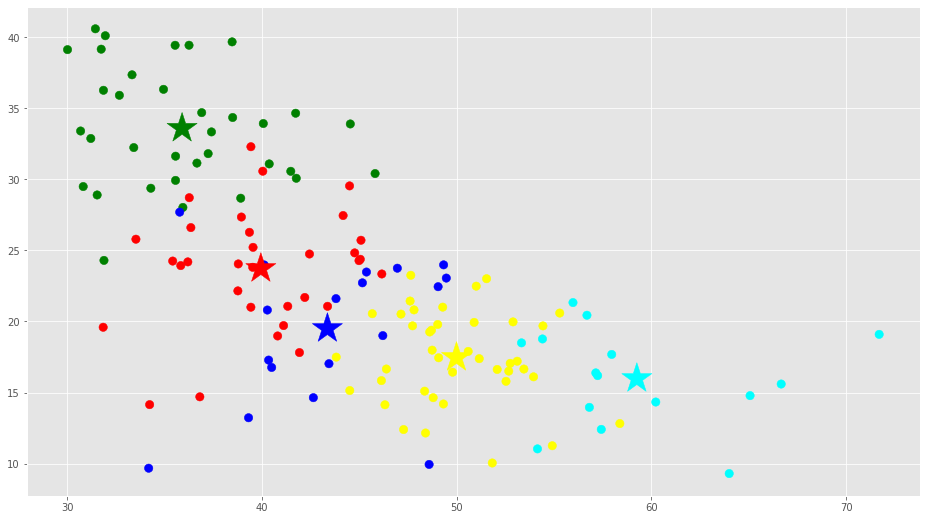

In [43]:
# Getting the values and plotting it
f1 = datos['op'].values
f2 = datos['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

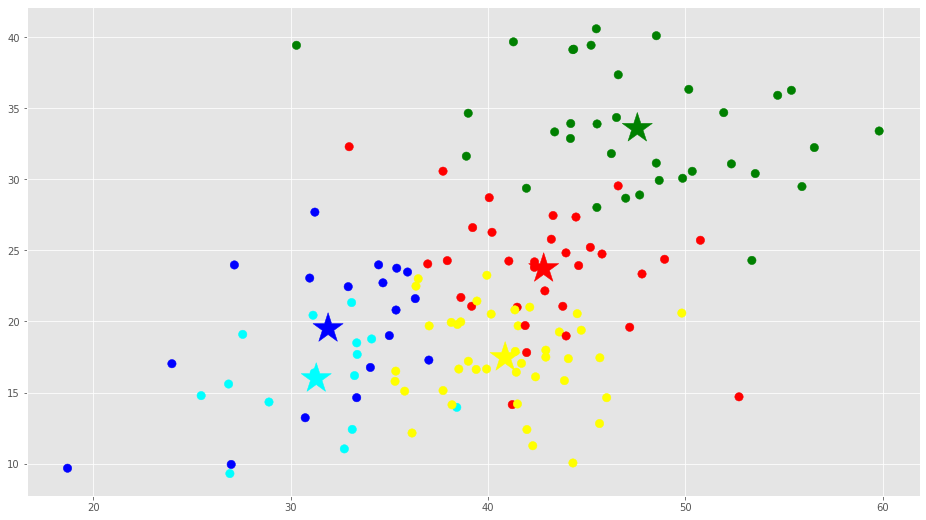

In [44]:
f1 = datos['ex'].values
f2 = datos['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

Cantidad de usuarios por cluster

In [45]:
copy =  pd.DataFrame()
copy['usuario']=datos['usuario'].values
copy['categoria']=datos['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,32
1,green,34
2,blue,18
3,cyan,15
4,yellow,41


Diversidad en rubros laborales de cada uno. 

In [46]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,3.0
2,2,4.0
3,3,1.0
4,4,2.0
5,5,NaN
6,6,4.0
7,7,9.0
8,8,7.0
9,9,2.0


#### 6. Evaluación del modelo

Reporte de clasificación del modelo 

In [47]:
print(classification_report(datos['categoria'],labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.09      0.11      0.10        27
           2       0.17      0.09      0.12        34
           3       0.07      0.11      0.08         9
           4       0.07      0.16      0.10        19
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00         6

    accuracy                           0.07       140
   macro avg       0.04      0.05      0.04       140
weighted avg       0.07      0.07      0.07       140



#### 7. Interpretación

En este caso se usa el algoritmo de clustering K-Means con un conjunto de datos en donde se tienen registros de usuarios de Twitter para de esa manera agruparlos por sus sentimientos y no por su actividad laboral en el conjunto de datos se cuentan con las siguiente variables:

Como variables independientes (Las marcadas en negritas son con las que se entra el modelo):
* usuario (el nombre en Twitter)
* **op - Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte** 
* co - Conscientiousness – grado de orden, prolijidad, organización
* **ex - Extraversion – grado de timidez, solitario o participación ante el grupo social**
* **ag - Agreeableness – grado de empatía con los demás, temperamento**
* ne - Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
* Wordcount – Cantidad promedio de palabras usadas en sus tweets

Como cariable dependiente:
* Categoria – Actividad laboral del usuario (actor, cantante, etc.)

Código de categoría

* 1.Actor/actriz
* 2.Cantante
* 3.Modelo
* 4.Tv, series
* 5.Radio
* 6.Tecnología
* 7.Deportes
* 8.Politica
* 9.Escritor

Dentro del modelo se realizaron 5 clusters los cuales muestran que al lograr agrupar a los 140 usuarios lograron hacer que usuarios de las distintas categorías estén dentro de cada una de ellas por ejemplo podemos ver la diversidad en rubros laborales de cada uno. Por ejemplo en el grupo 0 (rojo), vemos que hay de todas las actividades laborales aunque predominan de actividad 1 y 2 correspondiente a Actores y Cantantes con 11 y 15 famosos. 
De la categoría 3 “modelos” hay 6 sobre un total de 9.

Y como podemos ver en el reporte de clasificación este tiene una precisión del 14% en sus prediccione desglosado de la siguiente manera con su precisión:

* 1.Actor/actriz 0%
* 2.Cantante  9%
* 3.Modelo    17%
* 4.Tv, series 7%
* 5.Radio      7%
* 6.Tecnología 0%
* 7.Deportes   0%
* 8.Politica   0%
* 9.Escritor   0%

Quizás para mejorar el desempeño de este modelo se podrían usar otras variables o incluso cambiar o usar otro modelo de clasificación en donde se vean involucradas otras variables.


#### 8. Bibliografia

Información del caso y teoría del algoritmo:

Bagnato Juan. (2018). *K-Means en Python paso a paso*. 18 de diciembre de 2020, Sitio web: https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/